# Importing libs and files

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving results_with_crew.csv to results_with_crew (1).csv


# Reading CSV file into a Pandas Dataframe

In [64]:
movie_data = pd.read_csv("results_with_crew.csv")


# Initial data exploration

In [82]:
movie_data.head()
# list(movie_data.columns)

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3115613,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2172426,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.1,3091520,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2116489,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1553126,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."


# Visualizing top 10 movies by IMDB rating
- Selecting indexes from 0 to 9 with loc and inserting into a new DF
- Defining different colors according to average rating
- Creating a legend for chart colors
- Defining chart width and height
- Creating a bar chart with movie names and their ratings
- Adjusting xticks rotation and setting the legend

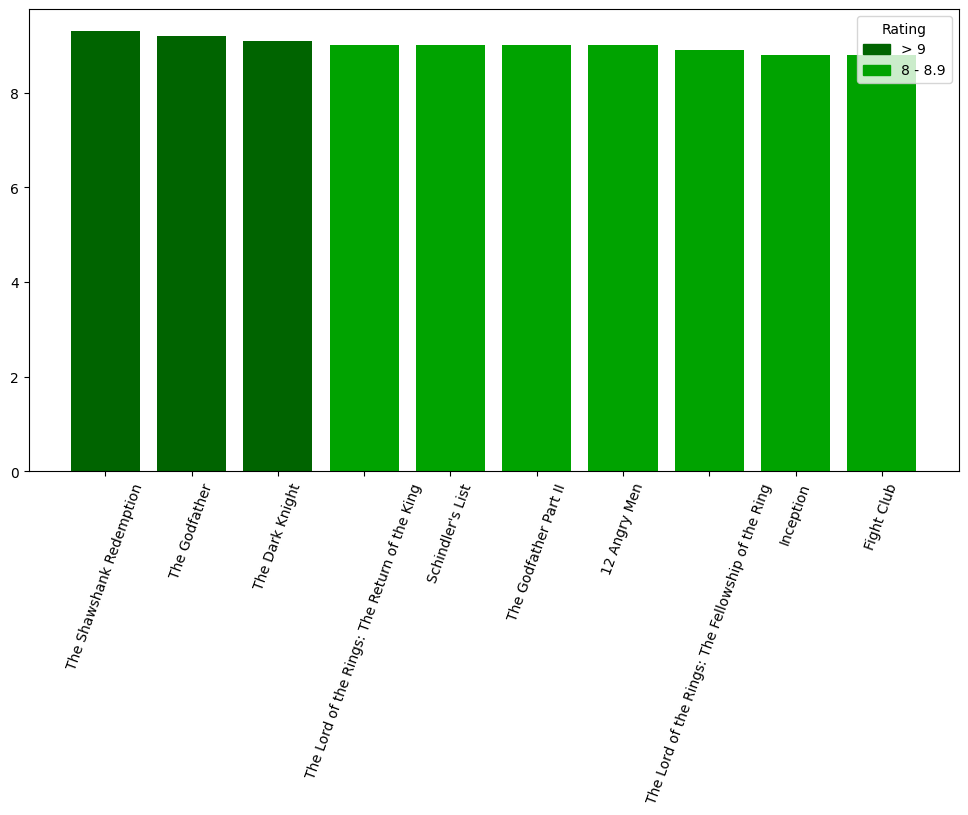

In [34]:
top_10_movies = movie_data.loc[:9]
colors = [
    '#006400' if rating > 9 else '#00A300'
    for rating in top_10_movies["averageRating"]
]

greater_than_9 = mpatches.Patch(color="#006400", label="> 9")
less_than_9 = mpatches.Patch(color="#00A300", label="8 - 8.9")
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies["primaryTitle"], top_10_movies["averageRating"], color=colors)
plt.xticks(rotation=70)
plt.legend(handles=[greater_than_9, less_than_9], title="Rating")



# Viewing top genres in the top 100 rated movies
- Selecting top 100 rated movies
- Splitting unique genres
- Using the explode method to turn each list element into a new row
- Using list compreheension to create a 0.2 space for each chart element
- Turning the list into a tuple to use in the chart's explode parameter
- Creating the figure and main axis
- Creating pie chart, defining data, labels and more visual settings


([<matplotlib.patches.Wedge at 0x7b806c845190>,
 [Text(0.8696050256082238, 1.160296125752784, 'Drama'),
  Text(-0.8551879256203876, 1.1709626859439624, 'Adventure'),
  Text(-1.3812319648597824, 0.441246256924163, 'Crime'),
  Text(-1.4101454788520797, -0.337623649161368, 'Action'),
  Text(-1.1384317962426234, -0.8980384431102013, 'Comedy'),
  Text(-0.8111598050577189, -1.2018817623454996, 'Animation'),
  Text(-0.45829618862521415, -1.3756687840798025, 'Sci-Fi'),
  Text(-0.0896143759826535, -1.4472281311587472, 'Mystery'),
  Text(0.26747334742618284, -1.4251168402684156, 'War'),
  Text(0.5919515651641101, -1.3236666289137005, 'Romance'),
  Text(0.8696046752085029, -1.1602963883661426, 'Fantasy'),
  Text(1.0926269599472838, -0.9532399101990834, 'Biography'),
  Text(1.2587146521029664, -0.7198176328635666, 'Thriller'),
  Text(1.3577200293771101, -0.5090150506892894, 'Horror'),
  Text(1.4013628068165418, -0.37240070310253615, 'Western'),
  Text(1.4251165075997356, -0.2674751199022687, 'Musi

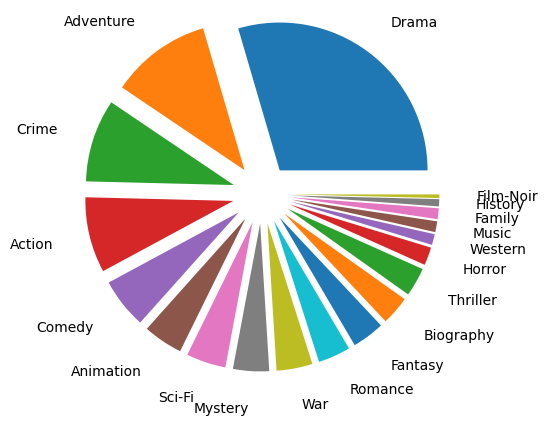

In [46]:
top_100_movies = movie_data.loc[0:99, "genres"]
genres = top_100_movies.str.split(", ")
genres = genres.explode().value_counts()
explode = [
    0.2 for genre in genres.index
]
explode = tuple(explode)

fig, ax = plt.subplots()
ax.pie(genres, labels=genres.index, labeldistance=1.25, explode=explode)

# Top movie directors

<Axes: xlabel='directors', ylabel='averageRating'>

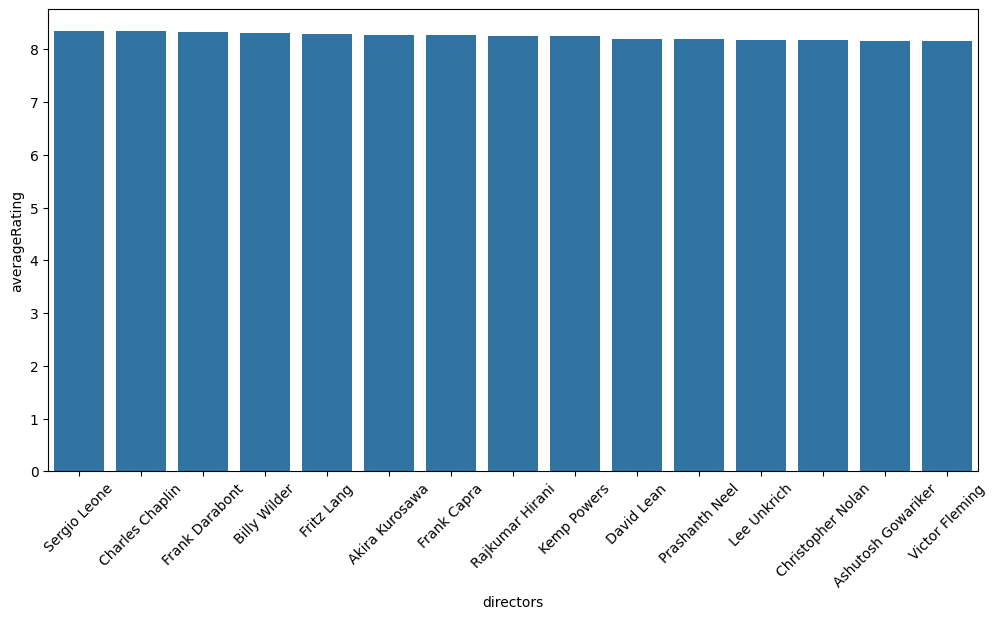

In [123]:
from numpy import average
# Filtering only movies with more than 100k reviews
more_than_100k_reviews = movie_data[(movie_data["numVotes"] > 100000)]
more_than_100k_reviews.loc[:, "directors"] = ( more_than_100k_reviews["directors"].str.split(", ") )
more_than_100k_reviews = more_than_100k_reviews.explode("directors")

# Unifying number of movies by directors and their average ratings
writers = pd.concat([more_than_100k_reviews["directors"].value_counts(), more_than_100k_reviews.groupby(["directors"])["averageRating"].mean()], axis=1)

# Selecting only directors with more than one movie
writers = writers[(writers["count"] > 1)]

# Ordering by director average rating
writers = writers.sort_values(by="averageRating", ascending=False)
top_10_directors = writers.iloc[0:15]

plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.barplot(x=top_10_directors.index, y=top_10_directors["averageRating"])
